# Projeto de Filtro FIR Passa-Baixa com Janela de Kaiser

## Introdução

Filtros FIR (Finite Impulse Response) são amplamente utilizados devido à sua estabilidade e fase linear. Neste trabalho, projetamos um filtro FIR passa-baixa usando o método da janela de Kaiser, garantindo:

- Atenuação na banda rejeitada ≥ 50 dB
- Frequência de corte: ωc = π/2
- Região de transição: Δω < 0,1π

Para isso, empregamos a biblioteca SciPy para calcular a resposta do filtro e suas transformações.

## Filtro FIR Passa-Baixa

O filtro será projetado pelo método da janela, usando a janela de Kaiser, que permite controlar a transição e atenuação com o parâmetro β.

### Cálculo do Parâmetro β

O valor de β depende da atenuação desejada:

<img src="./images/CalculoBeta.png" />

In [30]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Parâmetros do filtro
atenuacao_desejada = 50  # dB
frequencia_corte = np.pi / 2  # ωc = π/2
largura_transicao = 0.1 * np.pi  # Δω < 0,1π

# Cálculo do parâmetro β
beta = 0.5842 * (atenuacao_desejada - 21) ** 0.4 + 0.07886 * (atenuacao_desejada - 21) 

print(f"Parâmetro β calculado: {beta}")

Parâmetro β calculado: 4.533514120981248


### Projeto do Filtro

Com o valor de β calculado, podemos projetar o filtro FIR passa-baixa usando a janela de Kaiser. A seguir, apresentamos o código para projetar o filtro e plotar sua resposta em frequência.

O valor de M será:

<img src="./images/CalculoM.png" />

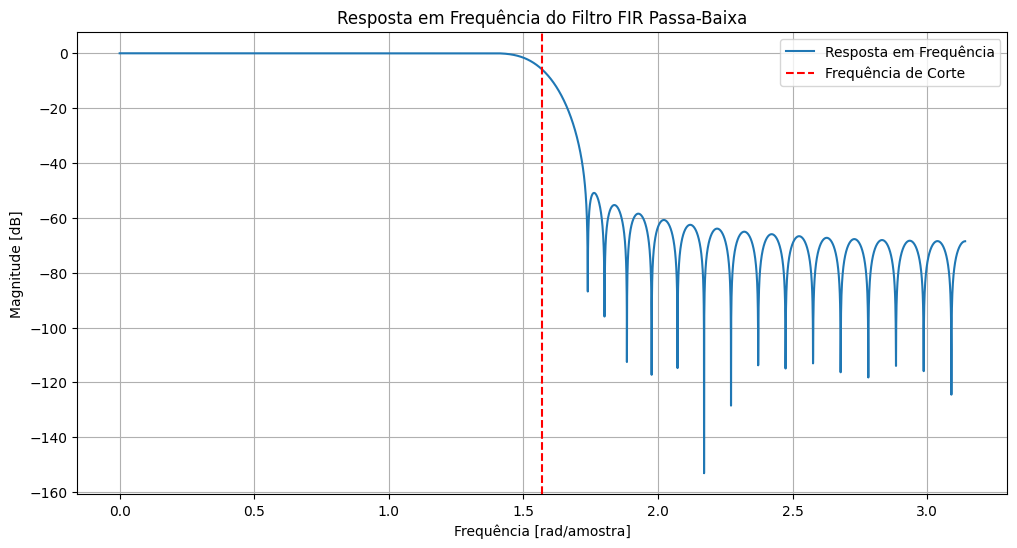

In [31]:
# Cálculo da ordem M do filtro (num_taps)
M = int(np.ceil((atenuacao_desejada - 8) / (2.285 * largura_transicao)))

# Projeta o filtro FIR
h_fir  = signal.firwin(M, frequencia_corte/np.pi, window=('kaiser', beta), scale=False)

# Resposta em frequência do filtro
frequencias, resposta = signal.freqz(h_fir , worN=8000)

# Plot da resposta em frequência
plt.figure(figsize=(12, 6))
plt.plot(frequencias, 20 * np.log10(np.abs(resposta)), label='Resposta em Frequência')
plt.title('Resposta em Frequência do Filtro FIR Passa-Baixa')
plt.xlabel('Frequência [rad/amostra]')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.axvline(frequencia_corte, color='red', linestyle='--', label='Frequência de Corte')
plt.legend()
plt.show()

### Implementação nas Formas Direta e em Cascata

A *forma direta* utiliza os coeficientes do filtro diretamente. Vamos quantizar os coeficientes para estudar a sensibilidade à quantização.

A *forma em cascata* decompõe o filtro em seções de segunda ordem (SOS). Vamos usar a função tf2sos da SciPy para converter a forma direta em cascata.

Coeficientes da forma direta (precisão infinita):
[ 6.09622853e-04 -1.49363906e-18 -1.18556263e-03 -3.05629209e-18
  1.99735175e-03 -3.68602210e-18 -3.09903630e-03  1.85125586e-17
  4.55512693e-03 -6.66260895e-18 -6.44638236e-03  8.36263844e-18
  8.88050568e-03 -1.01369409e-17 -1.20122931e-02  1.19244784e-17
  1.60832841e-02 -1.36590191e-17 -2.15054974e-02  1.52726284e-17
  2.90574591e-02 -1.66994006e-17 -4.04165594e-02  1.78791868e-17
  5.99686449e-02 -1.87610708e-17 -1.03853950e-01  1.93063558e-17
  3.17554479e-01  5.00000000e-01  3.17554479e-01  1.93063558e-17
 -1.03853950e-01 -1.87610708e-17  5.99686449e-02  1.78791868e-17
 -4.04165594e-02 -1.66994006e-17  2.90574591e-02  1.52726284e-17
 -2.15054974e-02 -1.36590191e-17  1.60832841e-02  1.19244784e-17
 -1.20122931e-02 -1.01369409e-17  8.88050568e-03  8.36263844e-18
 -6.44638236e-03 -6.66260895e-18  4.55512693e-03  1.85125586e-17
 -3.09903630e-03 -3.68602210e-18  1.99735175e-03 -3.05629209e-18
 -1.18556263e-03 -1.49363906e-18  6.0962

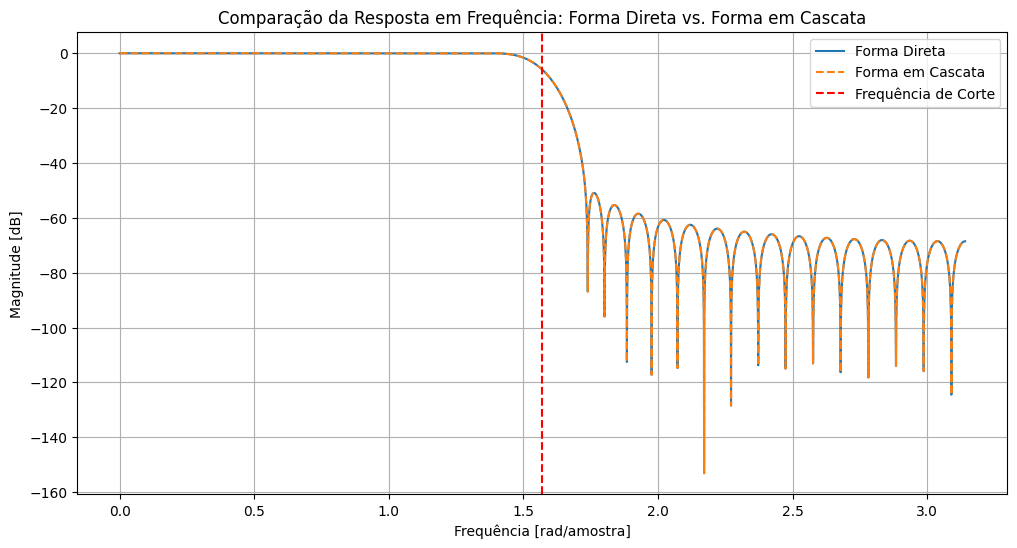

In [44]:
from scipy.signal import tf2sos

# Forma direta
print("Coeficientes da forma direta (precisão infinita):")
print(h_fir )

# Forma em cascata
sos = tf2sos(h_fir , 1)  # Converte para seções de segunda ordem (SOS)
print("\nCoeficientes da forma em cascata (precisão infinita):")
print(sos)



### Análise da Sensibilidade à Quantização
Vamos comparar a resposta em frequência do filtro com precisão infinita e com precisão finita

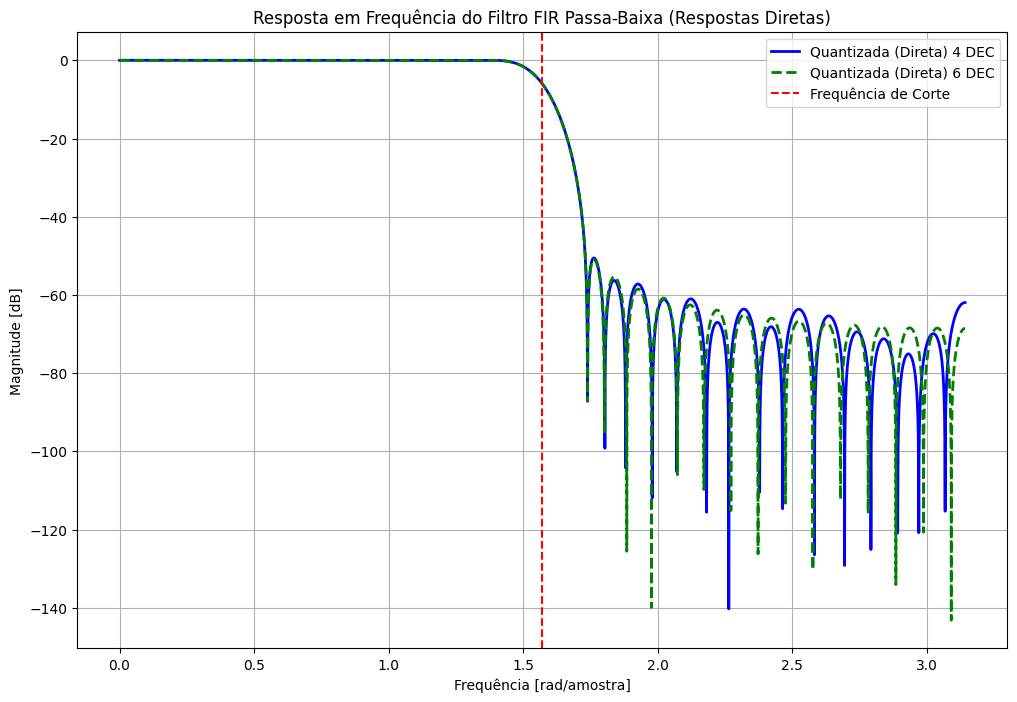

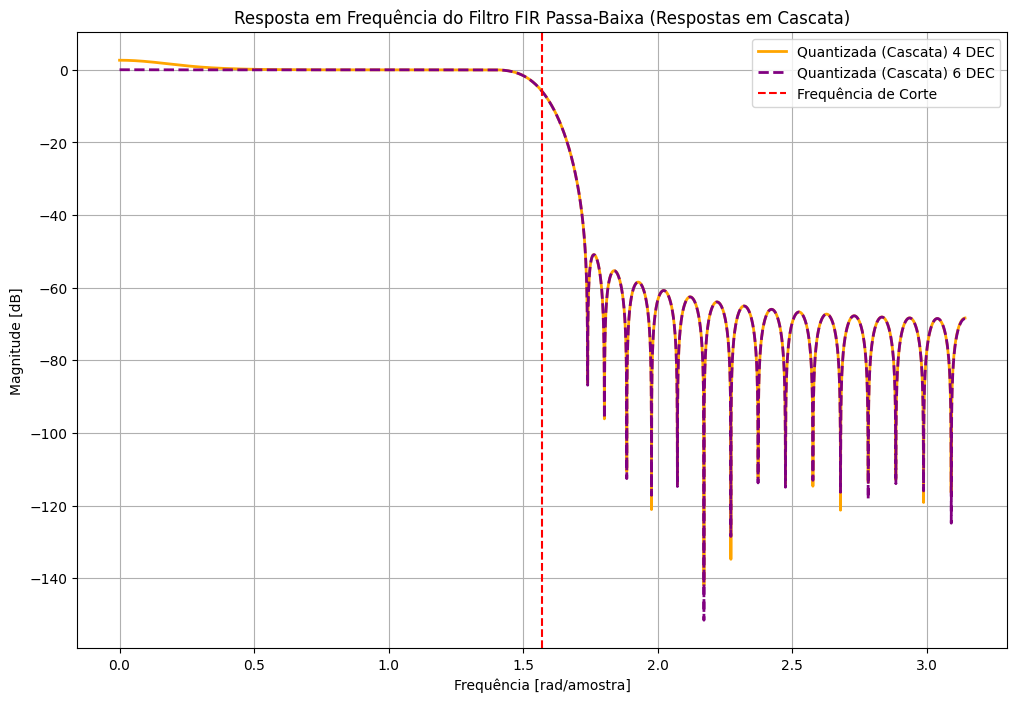

In [63]:
# Quantização dos coeficientes (exemplo: 4 casas decimais)
h_fir_quantizados_4dec = np.round(h_fir, decimals=4)

# Quantização dos coeficientes da forma em cascata (4 casas decimais)
sos_quantizados_4dec = np.round(sos, decimals=4)

# Quantização dos coeficientes (exemplo: 2 casas decimais)
h_fir_quantizados_6dec = np.round(h_fir, decimals=6)

# Quantização dos coeficientes da forma em cascata (2 casas decimais)
sos_quantizados_6dec = np.round(sos, decimals=6)

# Resposta em frequência para a forma direta quantizada
frequencias_q_4dec, resposta_direta_quantizada_4dec = signal.freqz(h_fir_quantizados_4dec, worN=8000)
frequencias_q_2dec, resposta_direta_quantizada_2dec = signal.freqz(h_fir_quantizados_6dec, worN=8000)

# Resposta em frequência para a forma em cascata quantizada
frequencias_q_sos_4dec, resposta_cascata_quantizada_4dec = signal.sosfreqz(sos_quantizados_4dec, worN=8000)
frequencias_q_sos_2dec, resposta_cascata_quantizada_2dec = signal.sosfreqz(sos_quantizados_6dec, worN=8000)

# Plot das respostas em frequência (Respostas Diretas)
plt.figure(figsize=(12, 8))
plt.plot(
    frequencias_q_4dec, 20 * np.log10(np.abs(resposta_direta_quantizada_4dec)),
    label='Quantizada (Direta) 4 DEC', color='blue', linestyle='-', linewidth=2
)
plt.plot(
    frequencias_q_2dec, 20 * np.log10(np.abs(resposta_direta_quantizada_2dec)),
    label='Quantizada (Direta) 6 DEC', color='green', linestyle='--', linewidth=2
)
plt.title('Resposta em Frequência do Filtro FIR Passa-Baixa (Respostas Diretas)')
plt.xlabel('Frequência [rad/amostra]')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.axvline(frequencia_corte, color='red', linestyle='--', label='Frequência de Corte')
plt.legend()
plt.show()

# Plot das respostas em frequência (Respostas em Cascata)
plt.figure(figsize=(12, 8))
plt.plot(
    frequencias_q_sos_4dec, 20 * np.log10(np.abs(resposta_cascata_quantizada_4dec)),
    label='Quantizada (Cascata) 4 DEC', color='orange', linestyle='-', linewidth=2
)
plt.plot(
    frequencias_q_sos_2dec, 20 * np.log10(np.abs(resposta_cascata_quantizada_2dec)),
    label='Quantizada (Cascata) 6 DEC', color='purple', linestyle='--', linewidth=2
)
plt.title('Resposta em Frequência do Filtro FIR Passa-Baixa (Respostas em Cascata)')
plt.xlabel('Frequência [rad/amostra]')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.axvline(frequencia_corte, color='red', linestyle='--', label='Frequência de Corte')
plt.legend()
plt.show()

### Precisão infinita vs Precisão finita

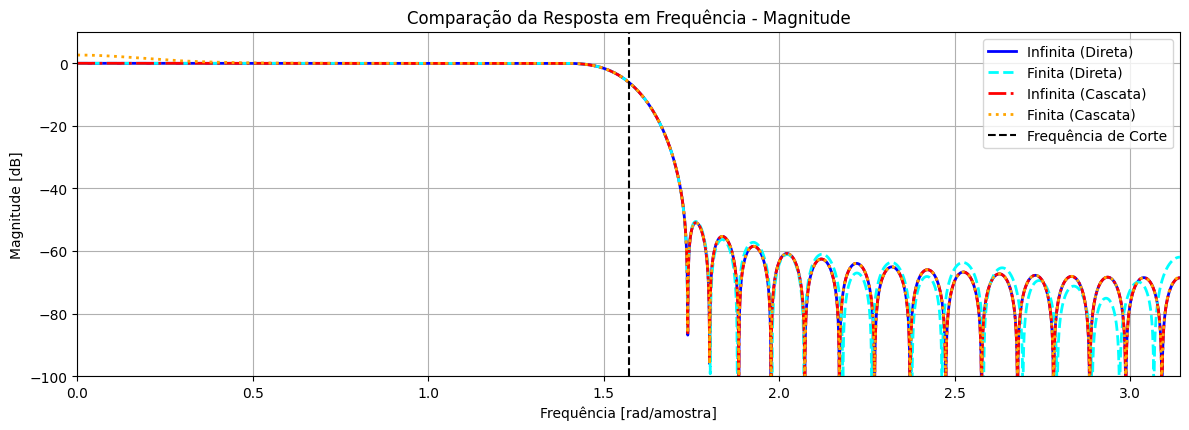

In [64]:
# Resposta em frequência para a forma direta (precisão infinita)
frequencias_inf, resposta_direta_inf = signal.freqz(h_fir, worN=8000)

# Resposta em frequência para a forma direta (precisão finita)
frequencias_fin, resposta_direta_fin = signal.freqz(h_fir_quantizados_4dec, worN=8000)

# Resposta em frequência para a forma em cascata (precisão infinita)
frequencias_inf_sos, resposta_cascata_inf = signal.sosfreqz(sos, worN=8000)

# Resposta em frequência para a forma em cascata (precisão finita)
frequencias_fin_sos, resposta_cascata_fin = signal.sosfreqz(sos_quantizados_4dec, worN=8000)


# Plot da resposta em magnitude
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(
    frequencias_inf, 20 * np.log10(np.abs(resposta_direta_inf)),
    label='Infinita (Direta)', color='blue', linestyle='-', linewidth=2
)
plt.plot(
    frequencias_fin, 20 * np.log10(np.abs(resposta_direta_fin)),
    label='Finita (Direta)', color='cyan', linestyle='--', linewidth=2
)
plt.plot(
    frequencias_inf_sos, 20 * np.log10(np.abs(resposta_cascata_inf)),
    label='Infinita (Cascata)', color='red', linestyle='-.', linewidth=2
)
plt.plot(
    frequencias_fin_sos, 20 * np.log10(np.abs(resposta_cascata_fin)),
    label='Finita (Cascata)', color='orange', linestyle=':', linewidth=2
)
plt.title('Comparação da Resposta em Frequência - Magnitude')
plt.xlabel('Frequência [rad/amostra]')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.axvline(frequencia_corte, color='black', linestyle='--', label='Frequência de Corte')
plt.legend()

# Ajustar limites dos eixos (opcional)
plt.ylim(-100, 10)  # Ajuste os valores conforme necessário
plt.xlim(0, np.pi)  # Limita o eixo x ao intervalo [0, π] para frequências normalizadas

plt.tight_layout()  # Melhora o espaçamento entre subplots
plt.show()



Com base nos gráficos analisados, podemos concluir que a forma direta de implementação de filtros FIR é significativamente mais sensível à quantização dos coeficientes, ou seja, à redução do número de casas decimais. Isso se deve ao fato de que pequenas alterações nos coeficientes afetam diretamente a resposta em frequência do filtro, resultando em mudanças perceptíveis na magnitude. Por outro lado, a forma em cascata demonstrou maior robustez à quantização, mantendo uma resposta em frequência mais estável mesmo com a redução do número de casas decimais. Essa diferença ocorre porque a estrutura em cascata divide o filtro em seções de segunda ordem, limitando a propagação de erros e tornando-a mais adequada para implementações em sistemas com precisão finita. Portanto, a forma em cascata é preferível em aplicações práticas onde a quantização dos coeficientes é inevitável.



### Transformações em frequência


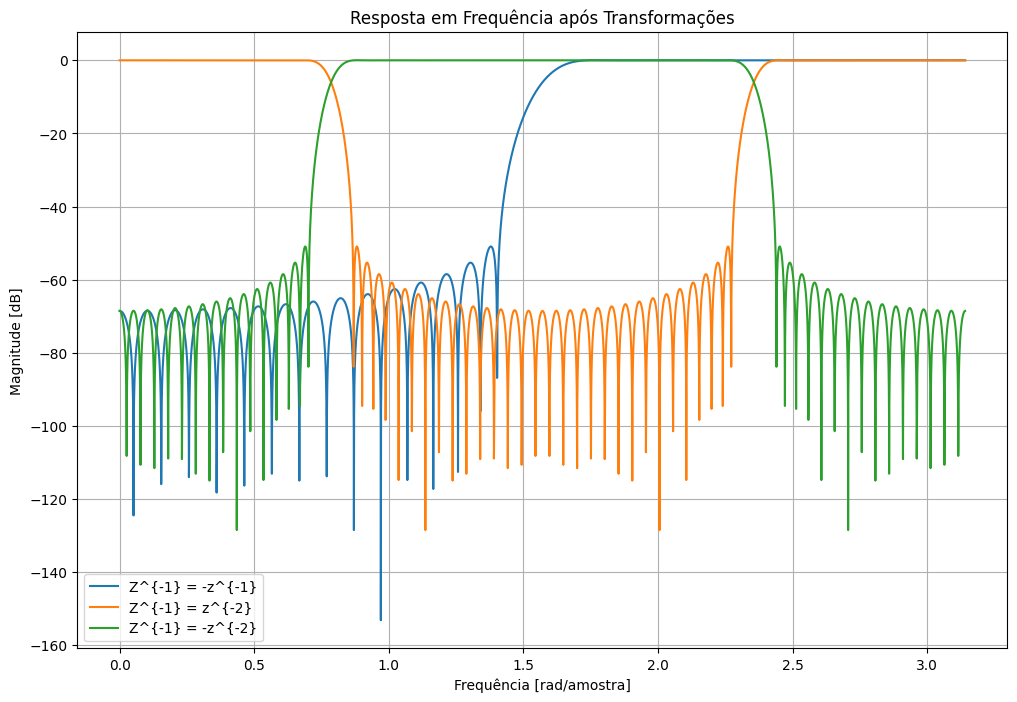

In [50]:
# Função para aplicar transformações em frequência
def transformar_filtro(h_fir , transformacao):
    if transformacao == 1:
        # Z^{-1} = -z^{-1}
        return h_fir  * (-1) ** np.arange(len(h_fir ))
    elif transformacao == 2:
        # Z^{-1} = z^{-2}
        novos_h_fir = np.zeros(2 * len(h_fir ) - 1)
        novos_h_fir[::2] = h_fir 
        return novos_h_fir
    elif transformacao == 3:
        # Z^{-1} = -z^{-2}
        novos_h_fir = np.zeros(2 * len(h_fir ) - 1)
        novos_h_fir[::2] = h_fir  * (-1) ** np.arange(len(h_fir ))
        return novos_h_fir

# Aplicando as transformações
transformacoes = [
    ("Z^{-1} = -z^{-1}", 1),
    ("Z^{-1} = z^{-2}", 2),
    ("Z^{-1} = -z^{-2}", 3)
]

plt.figure(figsize=(12, 8))
for nome, transformacao in transformacoes:
    h_fir_transformados = transformar_filtro(h_fir , transformacao)
    _, resposta_transformada = signal.freqz(h_fir_transformados, worN=8000)
    plt.plot(frequencias, 20 * np.log10(np.abs(resposta_transformada)), label=nome)

plt.title('Resposta em Frequência após Transformações')
plt.xlabel('Frequência [rad/amostra]')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.legend()
plt.show()

### Resultados
